<a href="https://colab.research.google.com/github/whyb2nrml/KNOU/blob/main/%EC%A7%80%EB%8A%A5%ED%98%95%EC%A0%95%EB%B3%B4%EC%B2%98%EB%A6%AC%EC%8B%9C%EC%8A%A4%ED%85%9C_5%EA%B0%95_K_%EA%B7%BC%EC%A0%91%EC%9D%B4%EC%9B%83_%EB%B6%84%EB%A5%98%EA%B8%B0_%EC%A0%90%EA%B2%80%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**디펜던시 로드**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import sqrtm

## Q1. 다음에 주어진 단계에 따라 데이터를 생성하고 K-근접이웃 분류기를 이용하여 분류를 수행하시오

### (1) 매틀랩을 이용하여 다음과 같은 평균과 공분산을 가지는 가우시안 분포를 따르는 2차원 데이터를 각각 100개씩 가지는 두 클래스 집합 C1, C2를 생성하시오. 생성된 데이터를 2차원 평면상의 점으로 표시한 그래프에 대해 설명하시오.

$μ_1 = [0, 0]^T, \quad μ_2 = [4, 4]^T, \quad $ 
$\sum_1 = \sum_2 = \begin{pmatrix} 1 & 0 \\ 0 & 2 \end{pmatrix}$

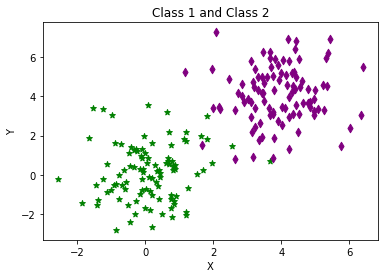

<Figure size 864x864 with 0 Axes>

In [ ]:
# 100*2 형태의 평균값 선언
N = 100
u1 = np.full((N, 2), [0, 0])
u2 = np.full((N, 2), [4, 4])

# 2*2 형태의 공분산 행렬 선언
sigma1 = np.full((2,2), [[1,0],[0,2]])
sigma2 = sigma1

# 100*2 형태, 평균=0, 분산=1의 정규분포값 선언 
c1 = np.random.normal(0, 1, size=(N, 2))
c2 = np.random.normal(0, 1, size=(N, 2))

# 정규분포 행렬 (100*2)와 공분산행렬제곱근의 행렬곱
c1 = c1 @ sqrtm(sigma1) + u1
c2 = c2 @ sqrtm(sigma2) + u2

# 시각화
x1, y1, x2, y2 = c1[:, 0], c1[:, 1], c2[:, 0], c2[:, 1]
fig, ax = plt.subplots()
fig = plt.figure(figsize=(12, 12))
ax.scatter(x1, y1, marker='*', color='green')
ax.scatter(x2, y2, marker='d', color='purple')
ax.set_title("Class 1 and Class 2")
ax.set_xlabel("X")
ax.set_ylabel("Y")
fig.show()

### (2) (1)의 데이터 집합과는 별도로 각 그룹별로 10개씩의 데이터를 따로 생성하여 그에 대해 설명하시오.

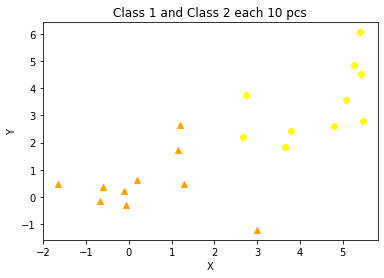

<Figure size 864x864 with 0 Axes>

In [ ]:
# 10*2 형태의 평균값 선언
N = 10
u1 = np.full((N, 2), [0, 0])
u2 = np.full((N, 2), [4, 4])

# 2*2 형태의 공분산 행렬 선언
sigma1 = np.full((2,2), [[1,0],[0,2]])
sigma2 = sigma1

# 10*2 형태, 평균=0, 분산=1의 정규분포값 선언 
c1 = np.random.normal(0, 1, size=(N, 2))
c2 = np.random.normal(0, 1, size=(N, 2))

# 정규분포 행렬 (10*2)와 공분산행렬제곱근의 행렬곱
c1 = c1 @ sqrtm(sigma1) + u1
c2 = c2 @ sqrtm(sigma2) + u2

# 시각화
x1, y1, x2, y2 = c1[:, 0], c1[:, 1], c2[:, 0], c2[:, 1]
fig, ax = plt.subplots()
fig = plt.figure(figsize=(12, 12))
ax.scatter(x1, y1, marker='^', color='orange')
ax.scatter(x2, y2, marker='o', color='yellow')
ax.set_title("Class 1 and Class 2 each 10 pcs")
ax.set_xlabel("X")
ax.set_ylabel("Y")
fig.show()

### (3) (2)에서 생성된 데이터를 K-근접이웃 방법으로 분류해 본다. 이때 K의 값을 3, 5, 10으로 변화시키면서 수행하고, 그 결과를 비교하시오.

#### 교재의 프로그램 5-1 K-Nearest Neighbor Classifier를 파이썬으로 구현해보기

In [ ]:
# 데이터 생성
N = 100

# 평균값 벡터 생성
u1 = np.full((N, 2), [0, 0])
u2 = np.full((N, 2), [3, 3])
u3 = np.full((N, 2), [0, 3.5])

# 공분산값 벡터 생성
sigma1 = np.full((2,2), [[1,0],[0,1]])
sigma2 = np.full((2,2), [[1,1.6],[1.6,4]])
sigma3 = np.full((2,2), [[2,0],[0,1]])

# 클래스별 정규분포 벡터 생성
c1 = np.random.normal(0, 1, size=(N, 2))
c2 = np.random.normal(0, 1, size=(N, 2))
c3 = np.random.normal(0, 1, size=(N, 2))

# 클래스별 목표 데이터 생성
c1 = np.matmul(c1, sqrtm(sigma1)) + u1
c2 = np.matmul(c2, sqrtm(sigma2)) + u2
c3 = np.matmul(c3, sqrtm(sigma3)) + u3

In [ ]:
for m in [3, 5, 10]:
  X = np.vstack((c1, c2, c3))
  Etrain = 0
  N = X.shape[0]
  for i in range(N):
    x=X[i, :] # 각 데이터에 대한 분류 시작
    d=[]
    for j in range(N):
      d.append(np.linalg.norm(x-X[j, :])) # 모든 데이터와의 거리 계산
    dct = {i:j for i, j in enumerate(d)}  # 계산된 거리별로 인덱스 부여: 딕셔너리 활용
    dct = {k: v for k, v in sorted(dct.items(), key=lambda item: item[1])} # value 오름차순으로 정렬
    si = list(dct.keys())
    # print(si)
    k=m; c=[0, 0, 0]
    for j in range(k):
      if si[j+1] <= 100: c[0] += 1 # j+1: 자기 자신과의 거리는 제외
      if si[j+1] > 200: c[2] += 1
      if (si[j+1] > 100) & (si[j+1] <= 200): c[1] += 1
    maxi = np.argmax(c)
    # print(i, c, maxi)
    if maxi != np.floor(( i/100 )) : Etrain += 1 # 실제 클래스와 가장 가까운 클래스 최빈도 클래스 비교, 일치하지 않으면 +1

  Error_rate = Etrain/N
  print(f"K값이 {m}인 경우, 오분류율은 {Error_rate}")

K값이 3인 경우, 오분류율은 0.2
K값이 5인 경우, 오분류율은 0.21666666666666667
K값이 10인 경우, 오분류율은 0.16666666666666666


#### 문제에 맞게 구현해보기

In [ ]:
# 10*2 형태의 평균값 선언
N = 10
u1 = np.full((N, 2), [0, 0])
u2 = np.full((N, 2), [4, 4])

# 2*2 형태의 공분산 행렬 선언
sigma1 = np.full((2,2), [[1,0],[0,2]])
sigma2 = sigma1

# 10*2 형태, 평균=0, 분산=1의 정규분포값 선언 
c1 = np.random.normal(0, 1, size=(N, 2))
c2 = np.random.normal(0, 1, size=(N, 2))

# 정규분포 행렬 (10*2)와 공분산행렬제곱근의 행렬곱
c1 = c1 @ sqrtm(sigma1) + u1
c2 = c2 @ sqrtm(sigma2) + u2

for m in [3, 5, 10]:
  X = np.vstack((c1, c2))
  Etrain = 0
  N = X.shape[0]
  for i in range(N):
    x=X[i, :] # 각 데이터에 대한 분류 시작
    d=[]
    for j in range(N):
      d.append(np.linalg.norm(x-X[j, :])) # 모든 데이터와의 거리 계산
    dct = {i:j for i, j in enumerate(d)}  # 계산된 거리별로 인덱스 부여: 딕셔너리 활용
    dct = {k: v for k, v in sorted(dct.items(), key=lambda item: item[1])} # value 오름차순으로 정렬
    si = list(dct.keys())
    # print(si)
    k=m; c=[0, 0]
    for j in range(k):
      if si[j+1] <= 10: c[0] += 1 # j+1: 자기 자신과의 거리는 제외
      if si[j+1] > 10: c[1] += 1
    maxi = np.argmax(c)
    # print(i, c, maxi)
    if maxi != np.floor(( i/10 )) : Etrain += 1 # 실제 클래스와 가장 가까운 클래스 최빈도 클래스 비교, 일치하지 않으면 +1

  Error_rate = Etrain/N
  print(f"K값이 {m}인 경우, 오분류율은 {Error_rate}")

K값이 3인 경우, 오분류율은 0.05
K값이 5인 경우, 오분류율은 0.05
K값이 10인 경우, 오분류율은 0.05


### (4) (3)에서 사용한 K값에 대해, 찾아지는 결정경계를 그래프로 그려보고, 설명하시오.

#### 문제에 맞게 구현해보기

0 3


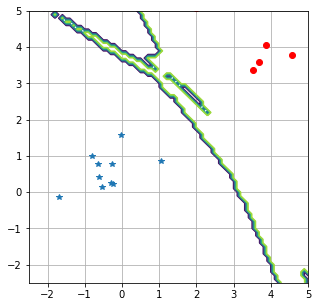

1 5


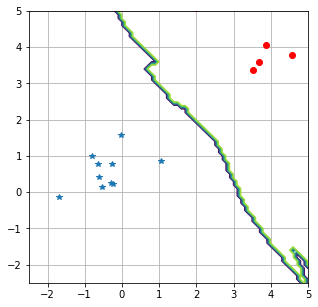

2 10


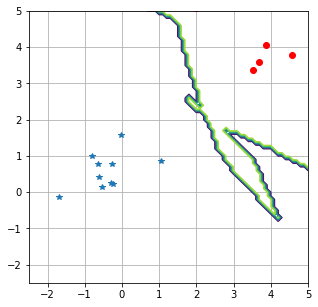

In [ ]:
# 10*2 형태의 평균값 선언
N = 10
u1 = np.full((N, 2), [0, 0])
u2 = np.full((N, 2), [4, 4])

# 2*2 형태의 공분산 행렬 선언
sigma1 = np.full((2,2), [[1,0],[0,2]])
sigma2 = sigma1

# 10*2 형태, 평균=0, 분산=1의 정규분포값 선언 
c1 = np.random.normal(0, 1, size=(N, 2))
c2 = np.random.normal(0, 1, size=(N, 2))

# 정규분포 행렬 (10*2)와 공분산행렬제곱근의 행렬곱
c1 = c1 @ sqrtm(sigma1) + u1
c2 = c2 @ sqrtm(sigma2) + u2

# 2차원 입력행렬을 격자형태로 나누어 입력행렬을 만듬
x = y = np.arange(-2.5, 5.5, 0.1)
[x, y] = np.meshgrid(x, y)

XY = []
for i in range(len(x[0])):
  for j in range(len(x[0])):
    crd = [x[i][j], y[i][j]]
    XY.append(crd)
XY = np.array(XY)

X = np.vstack((c1, c2))
N = X.shape[0]

# rxy1=[];rxy5=[];rxy10=[];rxy15=[]
for ix, m in enumerate([3, 5, 10]):
  print(ix, m)
  rxy1=[]
  for i in range(len(XY)):
    xt=XY[i]
    d=[]
    for j in range(N):
      d.append(np.linalg.norm(xt-X[j, :])) # 모든 데이터와의 거리 계산
    dct = {i:j for i, j in enumerate(d)}  # 계산된 거리별로 인덱스 부여: 딕셔너리 활용
    dct = {k: v for k, v in sorted(dct.items(), key=lambda item: item[1])} # value 오름차순으로 정렬
    si = list(dct.keys())
    k=m; c=[0, 0]
    for j in range(k):
      if si[j+1] <= 10: c[0] += 1 # j+1: 자기 자신과의 거리는 제외
      if si[j+1] > 10: c[1] += 1
    maxi = np.argmax(c)
    rxy1.append(maxi)
  
  plt.figure(figsize=(5, 5))
  # plt.subplot(1, 4, ix+1)
  plt.grid()
  plt.axis([-2.5, 5, -2.5, 5])
  plt.plot(c1[:, 0], c1[:, 1], '*')
  plt.plot(c2[:, 0], c2[:, 1], 'ro')
  res = np.reshape(rxy1, x.shape)
  plt.contour(x, y, res)
  plt.show()

#### 100개 데이터로 풀어보기

0 1


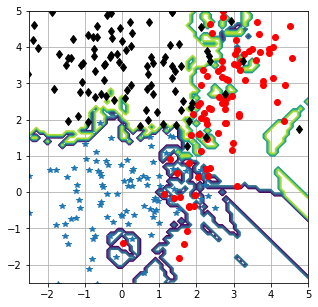

1 5


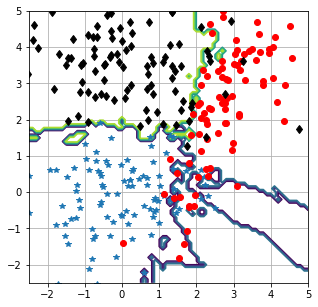

2 10


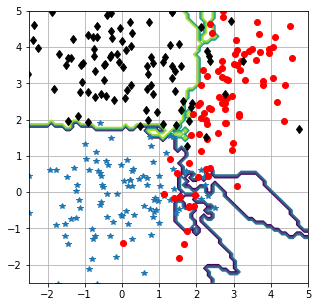

3 50


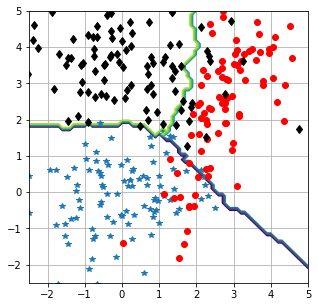

In [ ]:
# 데이터 생성
N = 100

# 평균값 벡터 생성
u1 = np.full((N, 2), [0, 0])
u2 = np.full((N, 2), [3, 3])
u3 = np.full((N, 2), [0, 3.5])

# 공분산값 벡터 생성
sigma1 = np.full((2,2), [[1,0],[0,1]])
sigma2 = np.full((2,2), [[1,1.6],[1.6,4]])
sigma3 = np.full((2,2), [[2,0],[0,1]])

# 클래스별 정규분포 벡터 생성
c1 = np.random.normal(0, 1, size=(N, 2))
c2 = np.random.normal(0, 1, size=(N, 2))
c3 = np.random.normal(0, 1, size=(N, 2))

# 클래스별 목표 데이터 생성
c1 = np.matmul(c1, sqrtm(sigma1)) + u1
c2 = np.matmul(c2, sqrtm(sigma2)) + u2
c3 = np.matmul(c3, sqrtm(sigma3)) + u3


# 2차원 입력행렬을 격자형태로 나누어 입력행렬을 만듬
x = y = np.arange(-2.5, 5.5, 0.1)
[x, y] = np.meshgrid(x, y)

XY = []
for i in range(len(x[0])):
  for j in range(len(x[0])):
    crd = [x[i][j], y[i][j]]
    XY.append(crd)
XY = np.array(XY)

X = np.vstack((c1, c2, c3))
N = X.shape[0]

# rxy1=[];rxy5=[];rxy10=[];rxy15=[]
for ix, m in enumerate([1, 5, 10, 50]):
  print(ix, m)
  rxy1=[]
  for i in range(len(XY)):
    xt=XY[i]
    d=[]
    for j in range(N):
      d.append(np.linalg.norm(xt-X[j, :])) # 모든 데이터와의 거리 계산
    dct = {i:j for i, j in enumerate(d)}  # 계산된 거리별로 인덱스 부여: 딕셔너리 활용
    dct = {k: v for k, v in sorted(dct.items(), key=lambda item: item[1])} # value 오름차순으로 정렬
    si = list(dct.keys())
    k=m; c=[0, 0, 0]
    for j in range(k):
      if si[j+1] <= 100: c[0] += 1 # j+1: 자기 자신과의 거리는 제외
      if si[j+1] > 200: c[2] += 1
      if (si[j+1] > 100) & (si[j+1] <= 200): c[1] += 1
    maxi = np.argmax(c)
    rxy1.append(maxi)

  plt.figure(figsize=(5, 5))
  # plt.subplot(1, 4, ix+1)
  plt.grid()
  plt.axis([-2.5, 5, -2.5, 5])
  plt.plot(c1[:, 0], c1[:, 1], '*')
  plt.plot(c2[:, 0], c2[:, 1], 'ro')
  plt.plot(c3[:, 0], c3[:, 1], 'kd')
  res = np.reshape(rxy1, x.shape)
  plt.contour(x, y, res)
  plt.show()

## Q2. 1번 문제에서 사용된 데이터에 대해, 교재의 [표 5-1]에서 제시된 여러 가지 거리함수들을 적용하여 분류를 수행해 보고 그 결과를 비교해 보시오.

**공통으로 사용할 데이터 생성**

In [ ]:
# 데이터 생성
N = 100

# 평균값 벡터 생성
u1 = np.full((N, 2), [0, 0])
u2 = np.full((N, 2), [3, 3])
u3 = np.full((N, 2), [0, 3.5])

# 공분산값 벡터 생성
sigma1 = np.full((2,2), [[1,0],[0,1]])
sigma2 = np.full((2,2), [[1,1.6],[1.6,4]])
sigma3 = np.full((2,2), [[2,0],[0,1]])

# 클래스별 정규분포 벡터 생성
c1 = np.random.normal(0, 1, size=(N, 2))
c2 = np.random.normal(0, 1, size=(N, 2))
c3 = np.random.normal(0, 1, size=(N, 2))

# 클래스별 목표 데이터 생성
c1 = np.matmul(c1, sqrtm(sigma1)) + u1
c2 = np.matmul(c2, sqrtm(sigma2)) + u2
c3 = np.matmul(c3, sqrtm(sigma3)) + u3

### 2차 노름 (유클리디안 거리)

K=1
K값이 1인 경우, 오분류율은 0.11333333333333333


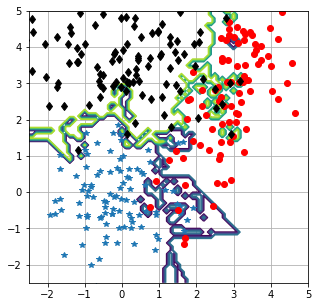

K=5
K값이 5인 경우, 오분류율은 0.08666666666666667


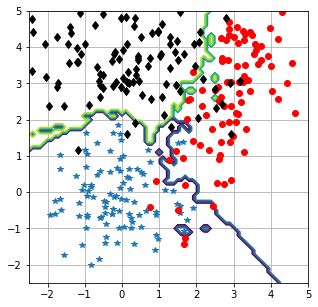

K=10
K값이 10인 경우, 오분류율은 0.08666666666666667


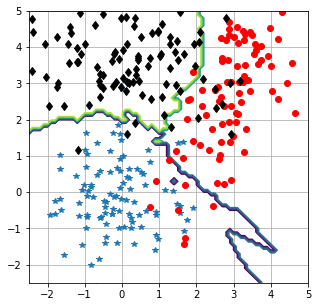

K=50
K값이 50인 경우, 오분류율은 0.08666666666666667


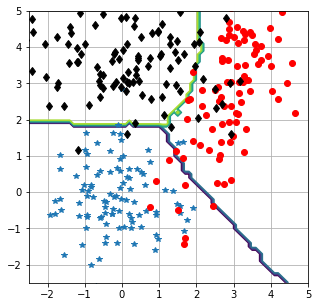

In [ ]:
# 2차원 입력행렬을 격자형태로 나누어 입력행렬을 만듬
x = y = np.arange(-2.5, 5.5, 0.1)
[x, y] = np.meshgrid(x, y)

XY = []
for i in range(len(x[0])):
  for j in range(len(x[0])):
    crd = [x[i][j], y[i][j]]
    XY.append(crd)
XY = np.array(XY)

# rxy1=[];rxy5=[];rxy10=[];rxy15=[]
for ix, m in enumerate([1, 5, 10, 50]):
  print(f"K={m}")
  X = np.vstack((c1, c2, c3))
  Etrain = 0
  N = X.shape[0]
  for i in range(N):
    xv=X[i, :] # 각 데이터에 대한 분류 시작
    d=[]
    for j in range(N):
      d.append(np.linalg.norm(xv-X[j, :], 2)) # 2차 노름: 디폴트가 2차 노름
    dct = {i:j for i, j in enumerate(d)}  # 계산된 거리별로 인덱스 부여: 딕셔너리 활용
    dct = {k: v for k, v in sorted(dct.items(), key=lambda item: item[1])} # value 오름차순으로 정렬
    si = list(dct.keys())
    # print(si)
    k=m; c=[0, 0, 0]
    for j in range(k):
      if si[j+1] <= 100: c[0] += 1 # j+1: 자기 자신과의 거리는 제외
      if si[j+1] > 200: c[2] += 1
      if (si[j+1] > 100) & (si[j+1] <= 200): c[1] += 1
    maxi = np.argmax(c)
    # print(i, c, maxi)
    if maxi != np.floor(( i/100 )) : Etrain += 1 # 실제 클래스와 가장 가까운 클래스 최빈도 클래스 비교, 일치하지 않으면 +1
  Error_rate = Etrain/N
  print(f"K값이 {m}인 경우, 오분류율은 {Error_rate}")
  
  rxy1=[]
  for i in range(len(XY)):
    xt=XY[i]
    d=[]
    for j in range(N):
      d.append(np.linalg.norm(xt-X[j, :], 2)) # 2차 노름: 디폴트가 2차 노름
    dct = {i:j for i, j in enumerate(d)}  # 계산된 거리별로 인덱스 부여: 딕셔너리 활용
    dct = {k: v for k, v in sorted(dct.items(), key=lambda item: item[1])} # value 오름차순으로 정렬
    si = list(dct.keys())
    k=m; c=[0, 0, 0]
    for j in range(k):
      if si[j+1] <= 100: c[0] += 1 # j+1: 자기 자신과의 거리는 제외
      if si[j+1] > 200: c[2] += 1
      if (si[j+1] > 100) & (si[j+1] <= 200): c[1] += 1
    maxi = np.argmax(c)
    rxy1.append(maxi)

  plt.figure(figsize=(5, 5))
  # plt.subplot(1, 4, ix+1)
  plt.grid()
  plt.axis([-2.5, 5, -2.5, 5])
  plt.plot(c1[:, 0], c1[:, 1], '*')
  plt.plot(c2[:, 0], c2[:, 1], 'ro')
  plt.plot(c3[:, 0], c3[:, 1], 'kd')
  res = np.reshape(rxy1, x.shape)
  plt.contour(x, y, res)
  plt.show()

### 1차 노름

K=1
K값이 1인 경우, 오분류율은 0.12


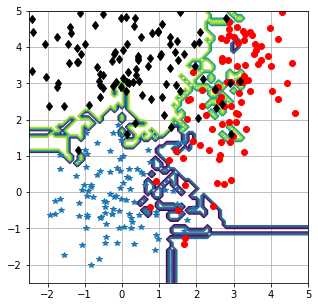

K=5
K값이 5인 경우, 오분류율은 0.08333333333333333


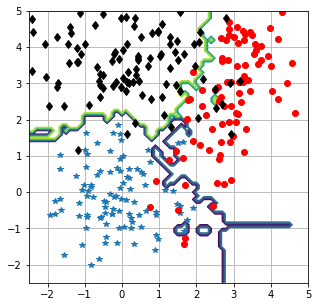

K=10
K값이 10인 경우, 오분류율은 0.09


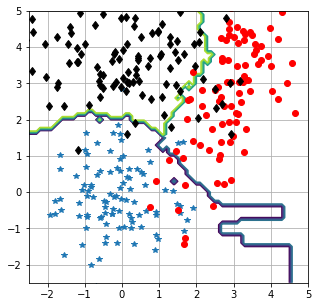

K=50
K값이 50인 경우, 오분류율은 0.09333333333333334


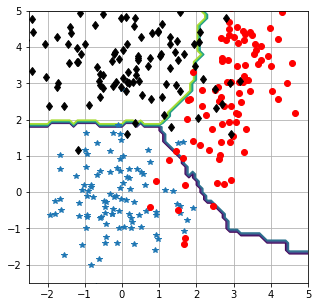

In [ ]:
# 2차원 입력행렬을 격자형태로 나누어 입력행렬을 만듬
x = y = np.arange(-2.5, 5.5, 0.1)
[x, y] = np.meshgrid(x, y)

XY = []
for i in range(len(x[0])):
  for j in range(len(x[0])):
    crd = [x[i][j], y[i][j]]
    XY.append(crd)
XY = np.array(XY)

# rxy1=[];rxy5=[];rxy10=[];rxy15=[]
for ix, m in enumerate([1, 5, 10, 50]):
  print(f"K={m}")
  X = np.vstack((c1, c2, c3))
  Etrain = 0
  N = X.shape[0]
  for i in range(N):
    xv=X[i, :] # 각 데이터에 대한 분류 시작
    d=[]
    for j in range(N):
      d.append(np.linalg.norm(xv-X[j, :], 1)) # 1차 노름
    dct = {i:j for i, j in enumerate(d)}  # 계산된 거리별로 인덱스 부여: 딕셔너리 활용
    dct = {k: v for k, v in sorted(dct.items(), key=lambda item: item[1])} # value 오름차순으로 정렬
    si = list(dct.keys())
    # print(si)
    k=m; c=[0, 0, 0]
    for j in range(k):
      if si[j+1] <= 100: c[0] += 1 # j+1: 자기 자신과의 거리는 제외
      if si[j+1] > 200: c[2] += 1
      if (si[j+1] > 100) & (si[j+1] <= 200): c[1] += 1
    maxi = np.argmax(c)
    # print(i, c, maxi)
    if maxi != np.floor(( i/100 )) : Etrain += 1 # 실제 클래스와 가장 가까운 클래스 최빈도 클래스 비교, 일치하지 않으면 +1
  Error_rate = Etrain/N
  print(f"K값이 {m}인 경우, 오분류율은 {Error_rate}")
  
  rxy1=[]
  for i in range(len(XY)):
    xt=XY[i]
    d=[]
    for j in range(N):
      d.append(np.linalg.norm(xt-X[j, :], 1)) # 1차 노름
    dct = {i:j for i, j in enumerate(d)}  # 계산된 거리별로 인덱스 부여: 딕셔너리 활용
    dct = {k: v for k, v in sorted(dct.items(), key=lambda item: item[1])} # value 오름차순으로 정렬
    si = list(dct.keys())
    k=m; c=[0, 0, 0]
    for j in range(k):
      if si[j+1] <= 100: c[0] += 1 # j+1: 자기 자신과의 거리는 제외
      if si[j+1] > 200: c[2] += 1
      if (si[j+1] > 100) & (si[j+1] <= 200): c[1] += 1
    maxi = np.argmax(c)
    rxy1.append(maxi)

  plt.figure(figsize=(5, 5))
  # plt.subplot(1, 4, ix+1)
  plt.grid()
  plt.axis([-2.5, 5, -2.5, 5])
  plt.plot(c1[:, 0], c1[:, 1], '*')
  plt.plot(c2[:, 0], c2[:, 1], 'ro')
  plt.plot(c3[:, 0], c3[:, 1], 'kd')
  res = np.reshape(rxy1, x.shape)
  plt.contour(x, y, res)
  plt.show()

### p차 노름 ( p를 inf로 보내는 경우를 가정)

K=1
K값이 1인 경우, 오분류율은 0.12


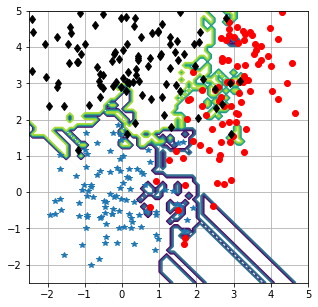

K=5
K값이 5인 경우, 오분류율은 0.08333333333333333


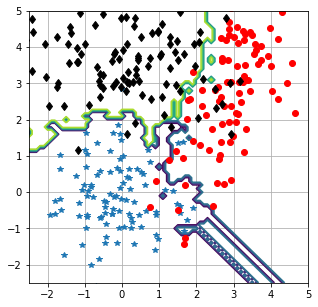

K=10
K값이 10인 경우, 오분류율은 0.08666666666666667


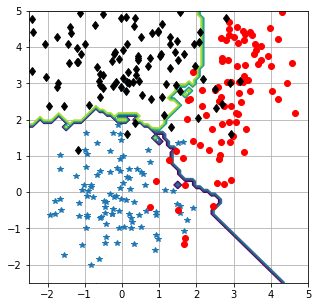

K=50
K값이 50인 경우, 오분류율은 0.08666666666666667


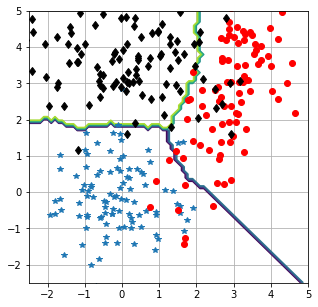

In [ ]:
# 2차원 입력행렬을 격자형태로 나누어 입력행렬을 만듬
x = y = np.arange(-2.5, 5.5, 0.1)
[x, y] = np.meshgrid(x, y)

XY = []
for i in range(len(x[0])):
  for j in range(len(x[0])):
    crd = [x[i][j], y[i][j]]
    XY.append(crd)
XY = np.array(XY)

# rxy1=[];rxy5=[];rxy10=[];rxy15=[]
for ix, m in enumerate([1, 5, 10, 50]):
  print(f"K={m}")
  X = np.vstack((c1, c2, c3))
  Etrain = 0
  N = X.shape[0]
  for i in range(N):
    xv=X[i, :] # 각 데이터에 대한 분류 시작
    d=[]
    for j in range(N):
      d.append(np.linalg.norm(xv-X[j, :], np.inf)) # p차 노름
    dct = {i:j for i, j in enumerate(d)}  # 계산된 거리별로 인덱스 부여: 딕셔너리 활용
    dct = {k: v for k, v in sorted(dct.items(), key=lambda item: item[1])} # value 오름차순으로 정렬
    si = list(dct.keys())
    # print(si)
    k=m; c=[0, 0, 0]
    for j in range(k):
      if si[j+1] <= 100: c[0] += 1 # j+1: 자기 자신과의 거리는 제외
      if si[j+1] > 200: c[2] += 1
      if (si[j+1] > 100) & (si[j+1] <= 200): c[1] += 1
    maxi = np.argmax(c)
    # print(i, c, maxi)
    if maxi != np.floor(( i/100 )) : Etrain += 1 # 실제 클래스와 가장 가까운 클래스 최빈도 클래스 비교, 일치하지 않으면 +1
  Error_rate = Etrain/N
  print(f"K값이 {m}인 경우, 오분류율은 {Error_rate}")
  
  rxy1=[]
  for i in range(len(XY)):
    xt=XY[i]
    d=[]
    for j in range(N):
      d.append(np.linalg.norm(xt-X[j, :], np.inf)) # p차 노름
    dct = {i:j for i, j in enumerate(d)}  # 계산된 거리별로 인덱스 부여: 딕셔너리 활용
    dct = {k: v for k, v in sorted(dct.items(), key=lambda item: item[1])} # value 오름차순으로 정렬
    si = list(dct.keys())
    k=m; c=[0, 0, 0]
    for j in range(k):
      if si[j+1] <= 100: c[0] += 1 # j+1: 자기 자신과의 거리는 제외
      if si[j+1] > 200: c[2] += 1
      if (si[j+1] > 100) & (si[j+1] <= 200): c[1] += 1
    maxi = np.argmax(c)
    rxy1.append(maxi)

  plt.figure(figsize=(5, 5))
  # plt.subplot(1, 4, ix+1)
  plt.grid()
  plt.axis([-2.5, 5, -2.5, 5])
  plt.plot(c1[:, 0], c1[:, 1], '*')
  plt.plot(c2[:, 0], c2[:, 1], 'ro')
  plt.plot(c3[:, 0], c3[:, 1], 'kd')
  res = np.reshape(rxy1, x.shape)
  plt.contour(x, y, res)
  plt.show()

### 내적

In [ ]:
X = np.vstack((c1, c2, c3))
a= X[0, :] ; b = X[1, :]
print(a)
print(b)
np.dot(a, b)
  # Etrain = 0
  # N = X.shape[0]
  # for i in range(N):
  #   xv=X[i, :] # 각 데이터에 대한 분류 시작
  #   d=[]
  #   for j in range(N):
  #     d.append(np.linalg.norm(xv-X[j, :], np.inf)) # p차 노름
  #   dct = {i:j for i, j in enumerate(d)}  # 계산된 거리별로 인덱스 부여: 딕셔너리 활용
  #   dct = {k: v for k, v in sorted(dct.items(), key=lambda item: item[1])} # value 오름차순으로 정렬
  #   si = list(dct.keys())
  #   # print(si)
  #   k=m; c=[0, 0, 0]
  #   for j in range(k):
  #     if si[j+1] <= 100: c[0] += 1 # j+1: 자기 자신과의 거리는 제외
  #     if si[j+1] > 200: c[2] += 1
  #     if (si[j+1] > 100) & (si[j+1] <= 200): c[1] += 1
  #   maxi = np.argmax(c)
  #   # print(i, c, maxi)
  #   if maxi != np.floor(( i/100 )) : Etrain += 1 # 실제 클래스와 가장 가까운 클래스 최빈도 클래스 비교, 일치하지 않으면 +1
  # Error_rate = Etrain/N
  # print(f"K값이 {m}인 경우, 오분류율은 {Error_rate}")

[ 0.18427492 -0.60737109]
[-0.4198335  -1.24622371]


0.679555465238321

### 코사인거리

In [ ]:
X = np.vstack((c1, c2, c3))
a= X[0, :] ; b = X[1, :]

# 코사인 유사도: cosθ 
def cos_sim(A, B):
  return np.dot(A, B)/(np.linalg.norm(A)*np.linalg.norm(B))

# 코사인 거리: 1-cosθ
def cos_dist(A, B):
  return 1 - cos_sim(A, B)

print(cos_sim(a, b))

print(cos_dist(a, b))


0.8141606558858563
0.1858393441141437


### 정규화된 유클리디안 거리

In [ ]:
from scipy.spatial.distance import seuclidean
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cdist

from scipy.linalg import sqrtm
import math

X = np.vstack((c1, c2, c3))
a= X[0, :] ; b = X[1, :]
X_var = [np.var(X[:, 0]), np.var(X[:, 1])]
# X_sqrt = [math.sqrt(X[:, 0]), math.sqrt(X[:, 1])]

X[:, 0]
# print(seuclidean(a, b, X_var))
# print(cdist(a, b, X_sqrt))

array([ 1.84274921e-01, -4.19833501e-01,  1.37407555e+00, -4.88318470e-01,
       -4.53658077e-01, -4.63447331e-01,  2.48813650e-01, -1.01517795e+00,
        1.75478978e+00, -9.29704335e-01,  9.71927564e-01, -1.33078019e-01,
       -1.79545357e+00, -9.23469973e-01, -3.27458714e-01,  1.32451464e-01,
        1.57373484e+00, -1.67268184e+00, -9.48530998e-01,  2.80705185e-01,
       -6.19175635e-02, -9.43020344e-01, -8.40374677e-01, -2.23325759e-01,
       -5.86836038e-01, -9.50177270e-01, -1.15482889e+00,  5.67189817e-01,
        1.91990428e+00, -7.71213941e-01,  4.99132664e-01,  9.20542874e-01,
       -1.62728887e+00,  3.28285573e-01, -1.08119735e+00, -1.66671475e-01,
       -1.99641197e-02, -9.56945667e-01,  4.66881774e-01,  5.22038736e-01,
       -1.23954565e+00, -8.44031456e-01, -5.19092983e-02,  7.04751087e-01,
        1.63307210e+00, -1.65411537e+00, -2.71903054e-01, -6.93048075e-01,
       -3.12012328e-01,  8.80588922e-01, -2.42778284e-01, -1.41609134e-01,
       -6.82563500e-01,  

In [ ]:
1/[0.1, 0.1, 0.1]

TypeError: ignored

### 마할라노비스 거리

In [ ]:
from scipy.spatial.distance import mahalanobis
import math

X = np.vstack((c1, c2, c3))
a= X[0, :] ; b = X[1, :]

# 클래스별 표본공분산의 평균
smean = (np.cov(c1[:, 0], c1[:, 1]) 
        + np.cov(c2[:, 0], c2[:, 1]) 
        + np.cov(c3[:, 0], c3[:, 1]) ) / 3

print( math.sqrt(np.matmul( np.matmul( (a-b), np.linalg.inv(smean)), (a-b))) ) # 왜 교재에는 sqrt가 빠져있을까?

print(mahalanobis(a, b, np.linalg.inv(smean)))

0.676347278891811
0.676347278891811
